In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/do19150/Gits/Analysis_Funcs/General/')
from fitsloader import XMMtolc

obs_df = pd.read_csv('/Users/do19150/Gits/ML_QPE/Features/realobs_test_data.csv',dtype='object')
obs_df = obs_df.astype({'STD/Mean':'float32','Prop > 1STD':'float32','Prop > 2STD':'float32','Prop > 3STD':'float32',
                        'Prop > 4STD':'float32','Prop > 5STD':'float32','Prop > 6STD':'float32',
                        'IQR/STD':'float32','Skew':'float32','Kurtosis':'float32','Rev CCF':'float32',
                        '2nd ACF':'float32','CSSD':'float32','Von Neumann Ratio':'float32','QPE?':'float32'})

col_names = ['STD/Mean','Prop > 1STD','Prop > 2STD','Prop > 3STD','Prop > 4STD','Prop > 5STD','Prop > 6STD','IQR/STD',
            'Skew','Kurtosis','Rev CCF','2nd ACF','CSSD','Von Neumann Ratio','QPE?']
qpe_df = pd.read_csv('/Users/do19150/Gits/ML_QPE/Features/qpe_feats.csv',names = col_names)
no_qpe_df = pd.read_csv('/Users/do19150/Gits/ML_QPE/Features/no_qpe_feats.csv',names = col_names)

/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/utils.py:24: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")
/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/largememory.py:25: UserWarning: Large Datasets may not be processed efficiently due to computational constraints
  warnings.warn(
/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/crossspectrum.py:28: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/crosscorrelation.py:8: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy fft")
/Users/do19150/opt/anaconda3/lib/python3.8/site-packages/stingray/bispectrum.py:10: UserWarning: pyfftw not installed. Using standard scipy fft
  warnings.warn("pyfftw not installed. Using standard scipy

In [2]:
obs_df['ObsID'].values

array(['0093641501', '0093641601', '0093641701', '0111790101',
       '0112550601', '0112551701', '0124710801', '0145800101',
       '0152170501', '0200670101', '0200670201', '0200670301',
       '0200670401', '0200920101', '0304190101', '0306630101',
       '0306630201', '0311190101', '0401360101', '0401360201',
       '0401360301', '0411980101', '0411980401', '0500730101',
       '0500730201', '0510011501', '0551450101', '0551870401',
       '0551870601', '0556090101', '0603260201', '0651790201',
       '0657820101', '0691570101', '0725200101', '0725200301',
       '0740960101', '0761630101', '0761630201', '0761630301',
       '0784510301', '0790650101', '0794581201', '0803670501',
       '0803670601', '0803671001', '0803671101', '0805080401',
       '0805080501', '0823680101', '0831790701', '0842340201',
       '0851180401', '0851180501', '0861910201', '0861910301',
       '0862760201', '0864330101', '0864330201', '0864330301',
       '0864330401', '0864560101', '0870830101', '08708

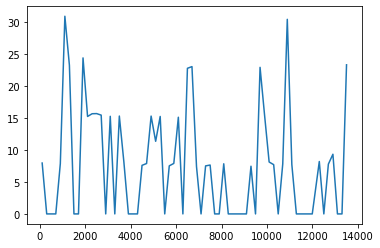

array([['0603260201', 2.1148722171783447, 0.20588235557079315,
        0.040441177785396576, 0.036764707416296005,
        0.0036764706019312143, 0.0036764706019312143, 0.0, 0.0,
        2.1857335567474365, 4.637410640716553, -2.230020046234131,
        0.15856677293777466, 0.5148147940635681, 2.0131208896636963, 0.0]],
      dtype=object)

In [3]:
obs = '0603260201'
index = np.where(obs_df['ObsID'].values == obs)[0]
lc = XMMtolc('/Users/do19150/Gits/ML_QPE/Obs/'+obs+'_.2-2.0_t10_pn.lc',t_bin=10)
lc.shift(-lc.time[0]).rebin(200).plot()
features = obs_df.iloc[index].values
features

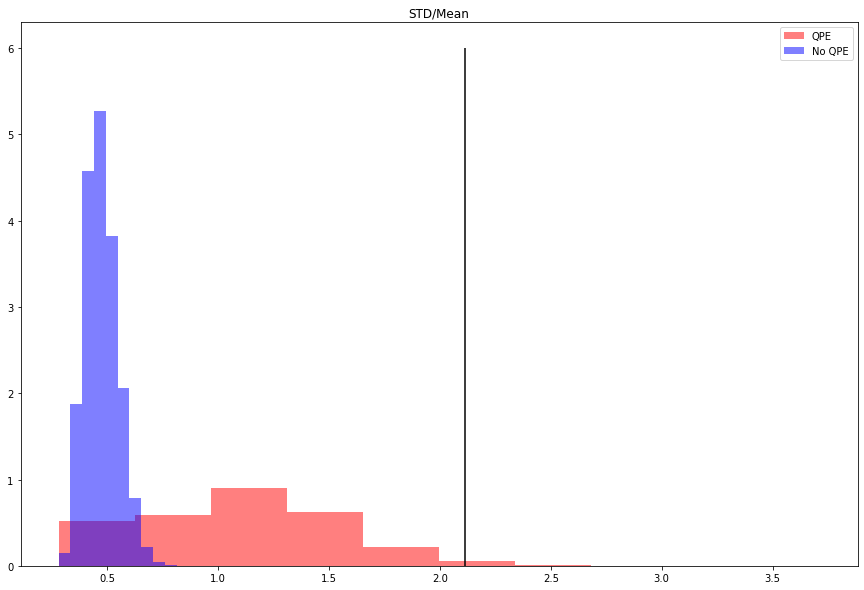

In [4]:
column_name = qpe_df.columns[0]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][1],0,6,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

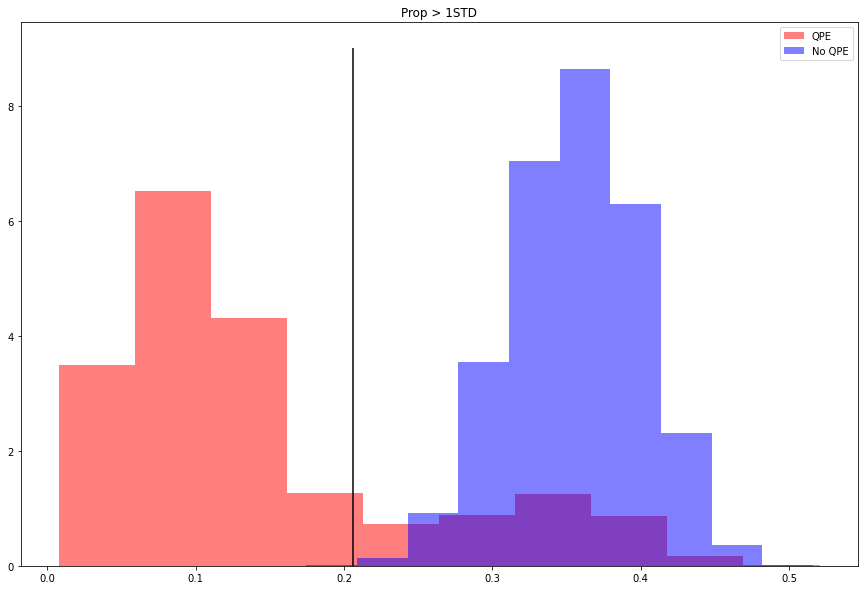

In [5]:
column_name = qpe_df.columns[1]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][2],0,9,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

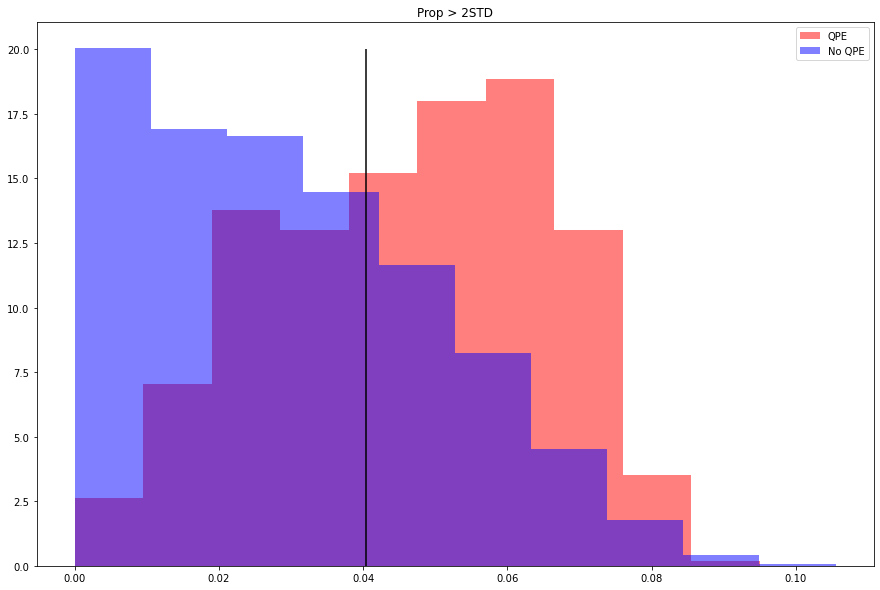

In [6]:
column_name = qpe_df.columns[2]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][3],0,20,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

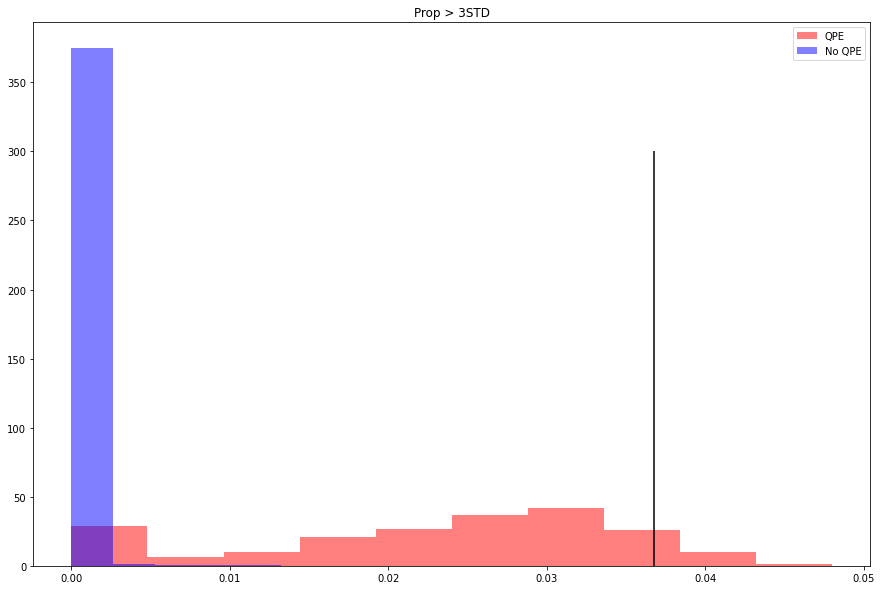

In [7]:
column_name = qpe_df.columns[3]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][4],0,300,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

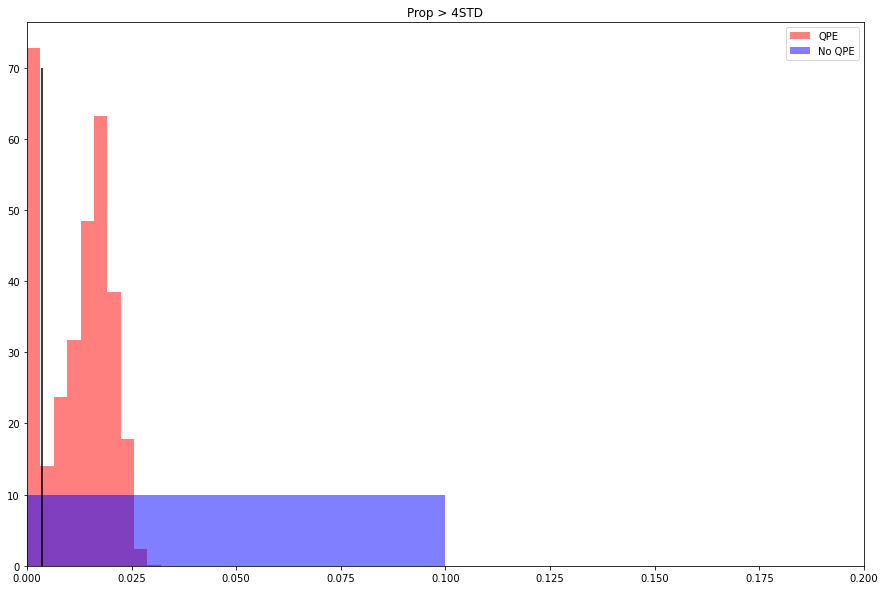

In [8]:
column_name = qpe_df.columns[4]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][5],0,70,color='k')
plt.xlim(0,0.2)
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

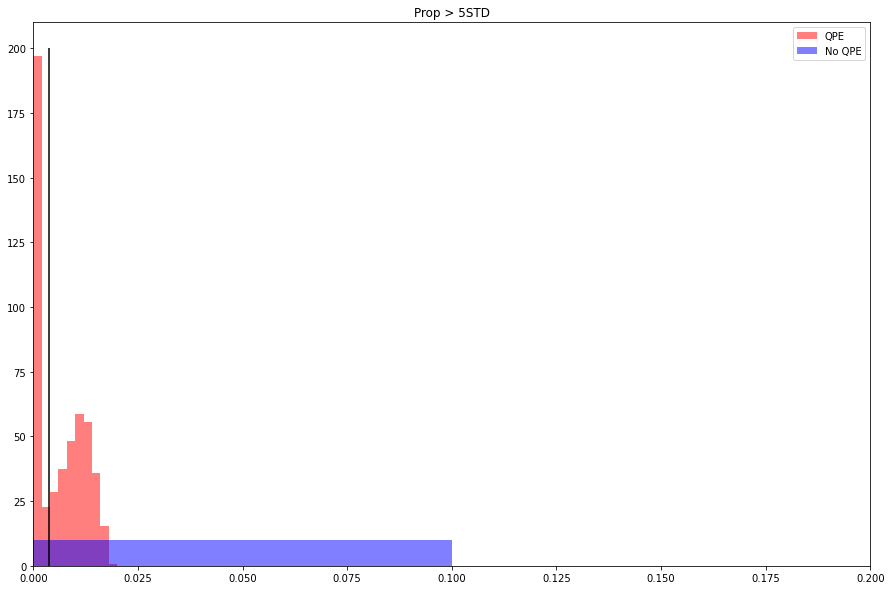

In [9]:
column_name = qpe_df.columns[5]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][6],0,200,color='k')
plt.title(column_name)
plt.xlim(0,0.2)
plt.legend(loc='upper right')
plt.show()

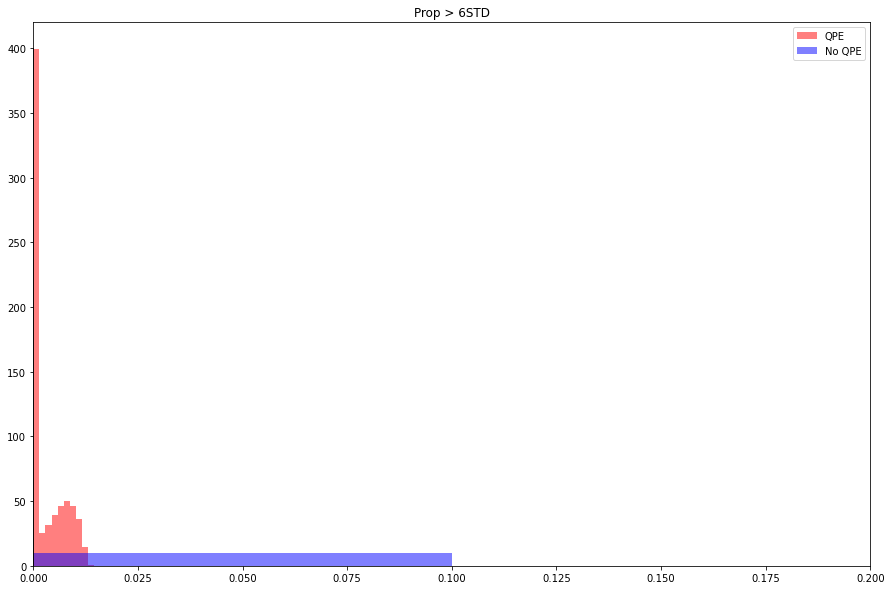

In [10]:
column_name = qpe_df.columns[6]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][7],0,400,color='k')
plt.title(column_name)
plt.xlim(0,0.2)
plt.legend(loc='upper right')
plt.show()

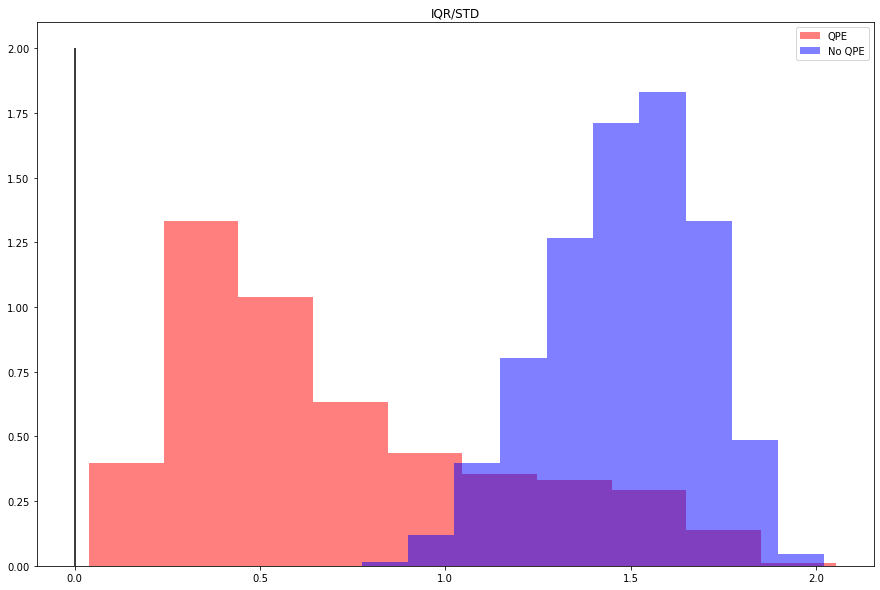

In [11]:
column_name = qpe_df.columns[7]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][8],0,2,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

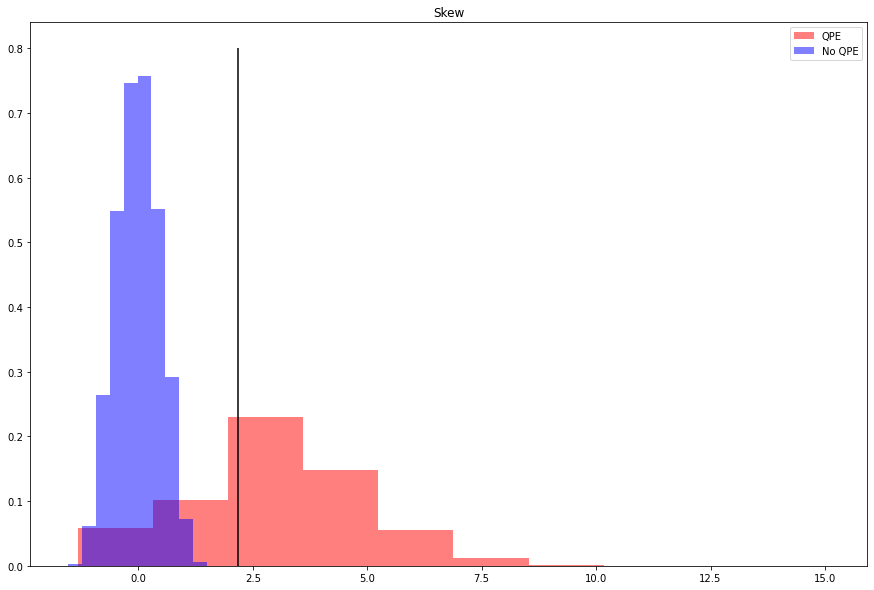

In [12]:
column_name = qpe_df.columns[8]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][9],0,0.8,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

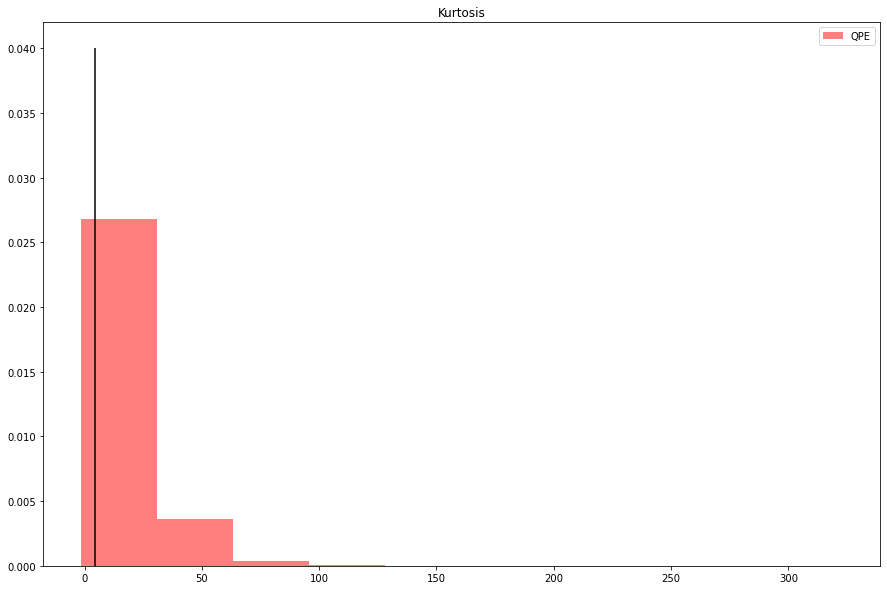

In [13]:
column_name = qpe_df.columns[9]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.vlines(features[0][10],0,0.04,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

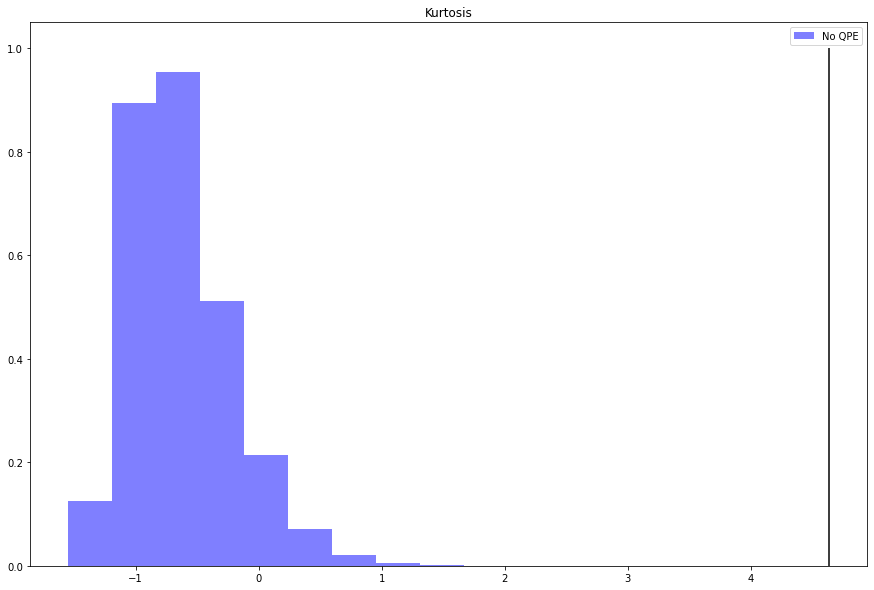

In [14]:
column_name = qpe_df.columns[9]
plt.subplots(figsize=(15,10))
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][10],0,1,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

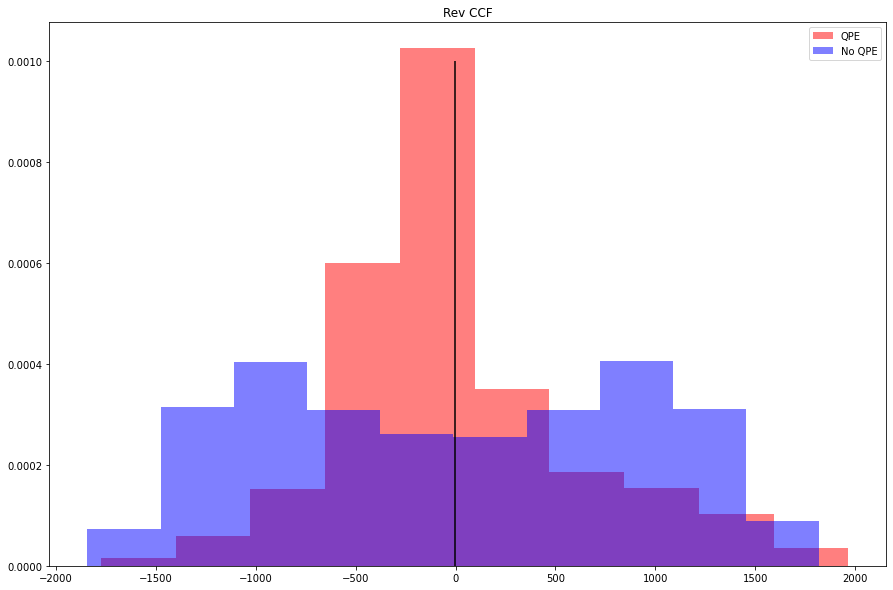

In [15]:
column_name = qpe_df.columns[10]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][11],0,0.001,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

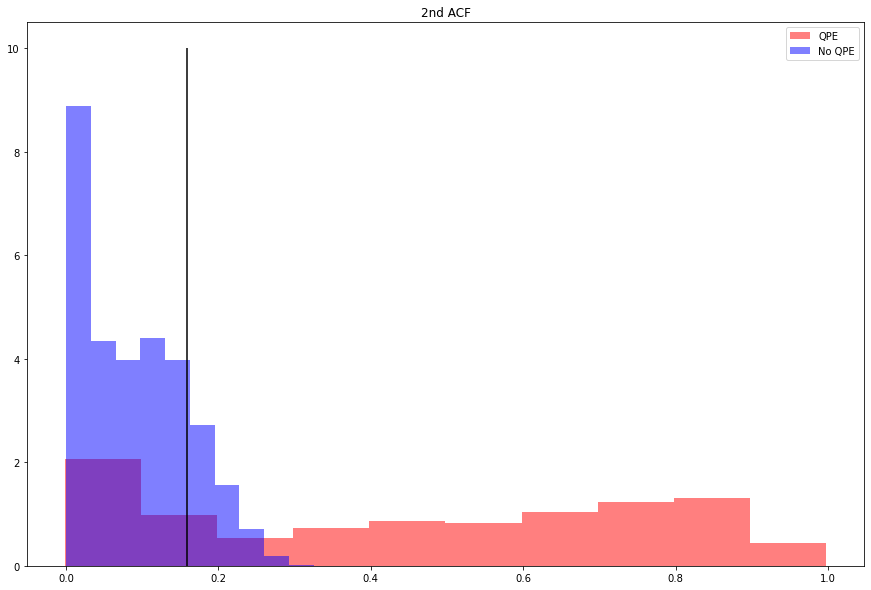

In [16]:
column_name = qpe_df.columns[11]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][12],0,10,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

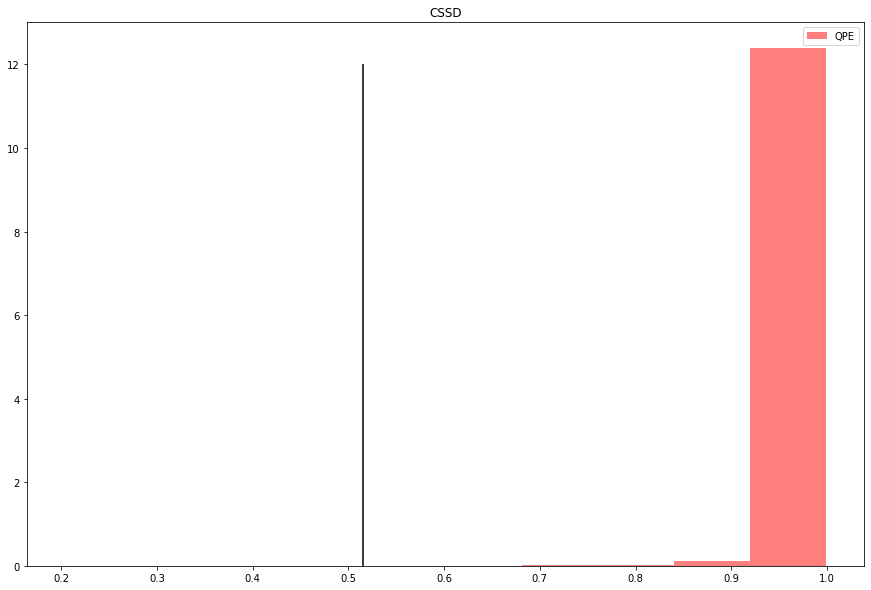

In [17]:
column_name = qpe_df.columns[12]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.vlines(features[0][13],0,12,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

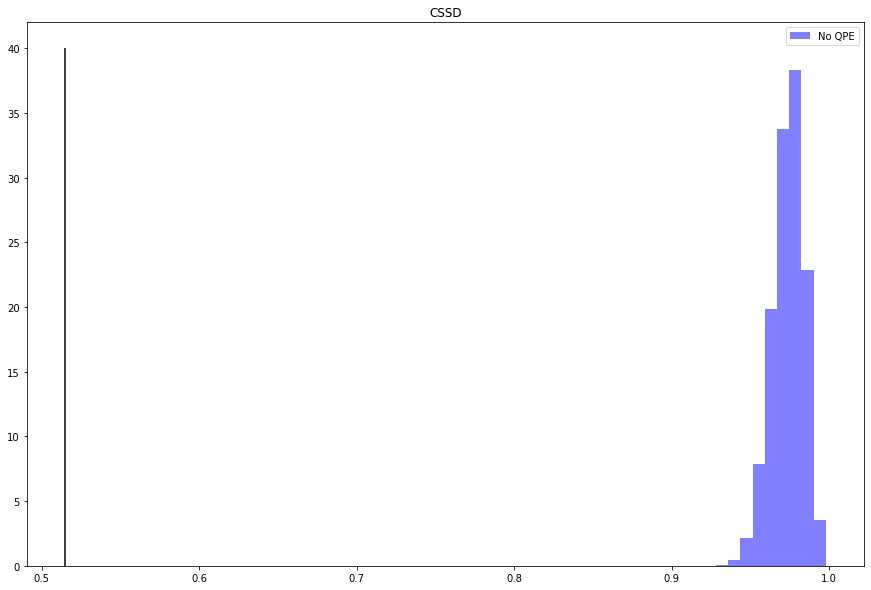

In [18]:
column_name = qpe_df.columns[12]
plt.subplots(figsize=(15,10))
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][13],0,40,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

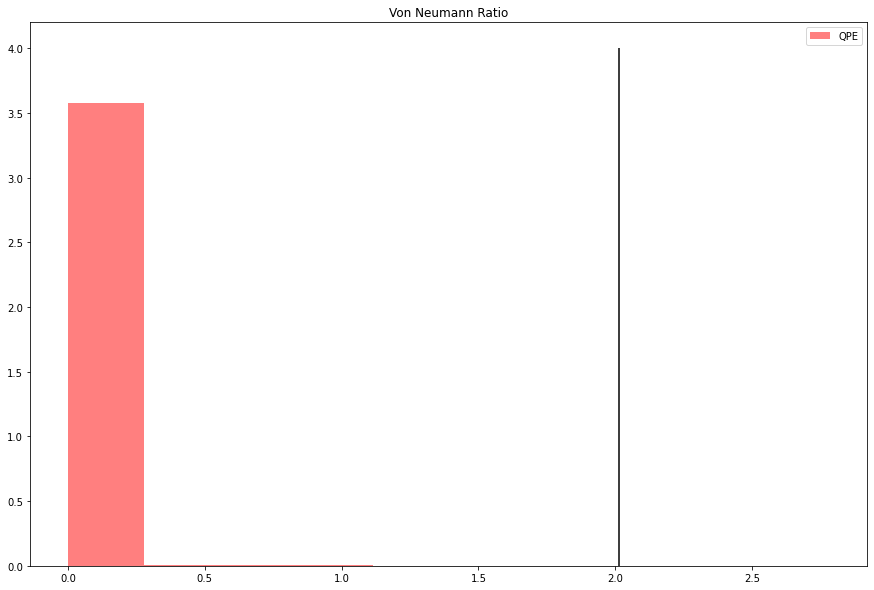

In [19]:
column_name = qpe_df.columns[13]
plt.subplots(figsize=(15,10))
plt.hist(qpe_df[column_name].values,density=True,alpha=0.5,color='r',label='QPE')
plt.vlines(features[0][14],0,4,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()

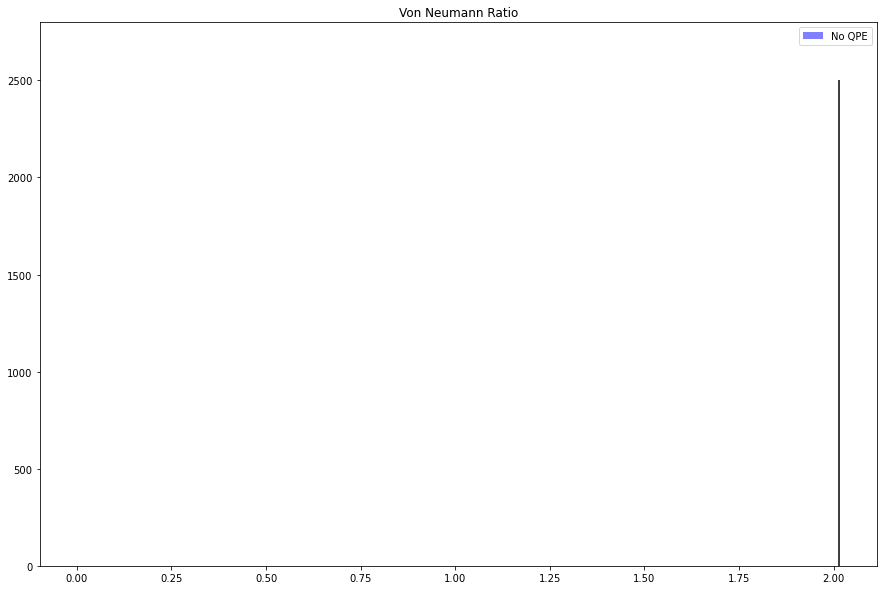

In [20]:
column_name = qpe_df.columns[13]
plt.subplots(figsize=(15,10))
plt.hist(no_qpe_df[column_name].values,density=True,alpha=0.5,color='b',label='No QPE')    
plt.vlines(features[0][14],0,2500,color='k')
plt.title(column_name)
plt.legend(loc='upper right')
plt.show()